# Arctic Ocean Delta Oriented Coastal Conditions

The first case focuses on researching the conditions of the Mackenzie Delta region, specifically near Tuktoyaktuk. The justification for using data from Tuktoyaktuk lies in its proximity to the Mackenzie Delta’s river mouth. According to the DeltaCAN satellite-extracted dataset (2025) [1] and the ArcTiCA dataset (2024) [2], which includes both satellite and buoy station data, Tuktoyaktuk—an Inuvialuit Hamlet community—provides relevant and reliable observations for this study appeared in both data set.

In [31]:
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd

In [32]:
DeltaCAN = pd.read_csv('data/DeltaCAN_Dataset.csv')
ArcTiCA = pd.read_csv('data/Arctic_Tidal_Constituents_Atlas_v3.csv')
mackenzie_lat_min, mackenzie_lat_max = 67.0, 70.5
mackenzie_lon_min, mackenzie_lon_max = -137.0, -130.0

## Filter all the data from both dataset 
Filter the dataset for locations within the Mackenzie Delta region using the limits set above

In [33]:
mackenzie_delta_data_1 = DeltaCAN[
    (DeltaCAN["Latitude"] >= mackenzie_lat_min) & (DeltaCAN["Latitude"] <= mackenzie_lat_max) &
    (DeltaCAN["Longitude"] >= mackenzie_lon_min) & (DeltaCAN["Longitude"] <= mackenzie_lon_max)
]
ArcTiCA['lon'] = ArcTiCA['lon'].apply(lambda x: x-360 if x > 180 else x)

mackenzie_delta_data_2 = ArcTiCA[
    (ArcTiCA["lat"] >= mackenzie_lat_min) & (ArcTiCA["lat"] <= mackenzie_lat_max) &
    (ArcTiCA["lon"] >= mackenzie_lon_min) & (ArcTiCA["lon"] <= mackenzie_lon_max)
]

In [ ]:
tuktoyaktuk_coords = (-133.034200, 69.445400)
radius = 0.5  # Define a radius in degrees to filter nearby data

# Filter data_1 for points within the radius of Tuktoyaktuk
nearby_data_1 = mackenzie_delta_data_1[
    (mackenzie_delta_data_1["Latitude"] >= tuktoyaktuk_coords[1] - radius) & 
    (mackenzie_delta_data_1["Latitude"] <= tuktoyaktuk_coords[1] + radius) & 
    (mackenzie_delta_data_1["Longitude"] >= tuktoyaktuk_coords[0] - radius) & 
    (mackenzie_delta_data_1["Longitude"] <= tuktoyaktuk_coords[0] + radius)
]
display(nearby_data_1)
# Filter data_2 for points within the radius of Tuktoyaktuk
nearby_data_2 = mackenzie_delta_data_2[
    (mackenzie_delta_data_2["lat"] >= tuktoyaktuk_coords[1] - radius) & 
    (mackenzie_delta_data_2["lat"] <= tuktoyaktuk_coords[1] + radius) & 
    (mackenzie_delta_data_2["lon"] >= tuktoyaktuk_coords[0] - radius) & 
    (mackenzie_delta_data_2["lon"] <= tuktoyaktuk_coords[0] + radius)
]
display(nearby_data_2)

,Delta ID,Latitude,Longitude,Tidal range (m),Permafrost classification with ice content,Distance to nearest community (m),Canadian geographic name,Language spoken,Name of region in original language,Community type,Province
2249,A9_J2,69.463775,-133.528531,0.39,Continuous permafrost with high ground ice con...,19356.14717,Tuktoyaktuk,"Inuinnaqtun, Western Canadian Inuktitut",,Hamlet,Northwest Territories


,source_id,lon,lat,cons,amp,pha,amp_uncert,pha_uncert,start,end,...,rec_length,sampling_rate,data_flag,expert_flag,inference,site_record,site_total,amp_units,uncert_info,notes
31731,24,-132.99,69.44,N2,1.561,288.420,0.067,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31732,24,-132.99,69.44,K1,3.007,162.593,0.052,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31733,24,-132.99,69.44,SA,10.429,196.932,0.037,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31734,24,-132.99,69.44,M2,11.541,306.631,0.066,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31735,24,-132.99,69.44,T2,1.443,60.540,0.002,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31736,24,-132.99,69.44,MM,0.943,192.506,0.001,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31737,24,-132.99,69.44,S1,0.151,161.216,0.006,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31738,24,-132.99,69.44,O1,2.456,189.194,0.045,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31739,24,-132.99,69.44,2N2,0.183,299.301,0.003,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN
31740,24,-132.99,69.44,J1,0.147,165.440,0.002,0.0,1961-11-01,2021-04-13,...,14975.25,60.0,0.0,0.0,No,1.0,1.0,cm,STD,NaN


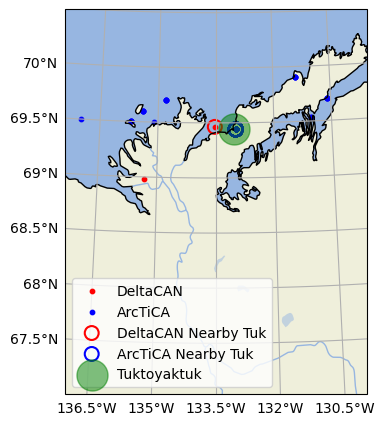

In [35]:
fig = plt.figure(figsize=[5, 5])
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(-133.5, 68.75))
ax.set_extent([mackenzie_lon_min, mackenzie_lon_max, mackenzie_lat_min, mackenzie_lat_max], crs=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.scatter(mackenzie_delta_data_1['Longitude'], mackenzie_delta_data_1['Latitude'], color='red', s=10, transform=ccrs.PlateCarree(), label='DeltaCAN')
ax.scatter(mackenzie_delta_data_2['lon'], mackenzie_delta_data_2['lat'], color='blue', s=10, transform=ccrs.PlateCarree(), label='ArcTiCA')
ax.scatter(nearby_data_1['Longitude'], nearby_data_1['Latitude'], edgecolor='red', facecolor='none', s=100, linewidth=1.5, transform=ccrs.PlateCarree(), label='DeltaCAN Nearby Tuk')
ax.scatter(nearby_data_2['lon'], nearby_data_2['lat'], edgecolor='blue', facecolor='none', s=100, linewidth=1.5, transform=ccrs.PlateCarree(), label='ArcTiCA Nearby Tuk')

ax.scatter(*tuktoyaktuk_coords, color='green', alpha=0.5, s=500, transform=ccrs.PlateCarree(), label='Tuktoyaktuk')
# ax.text(tuktoyaktuk_coords[0] + 0.1, tuktoyaktuk_coords[1] - 0.1, 'Tuktoyaktuk', transform=ccrs.PlateCarree(), fontsize=12, color='green')

ax.legend()
plt.show()


In [36]:
tidal_range_data_1 = nearby_data_1['Tidal range (m)']
tidal_range_data_2 = nearby_data_2[nearby_data_2['source'] == 'TICON-3']['amp']  # Assuming 'amp' represents tidal range in ArcTiCA dataset

print("Tidal range from DeltaCAN dataset:")
print(tidal_range_data_1)

print("\nAverage tidal range from ArcTiCA dataset:")
print(tidal_range_data_2.mean())

Tidal range from DeltaCAN dataset:
2249    0.39
Name: Tidal range (m), dtype: object

Average tidal range from ArcTiCA dataset:
1.5036250000000002


  ## NOTE!
  Tide Amp from ArcTiCA dataset is in unit of cm while DeltaCAN is in meter.

## Type of Tide

Tuktoyaktuk experiences a mixed semidiurnal tide cycle, with two high and two low tides per day of varying heights. Observations from the Canadian Hydrographic Service (CHS) indicate that tidal heights can reach up to 0.86 m, with seasonal variations influenced by sea ice cover and proximity to shore [3]. Data from DeltaCAN and ArcTiCA estimate an approximate tidal range of 0.39 m, highlighting the variability caused by the region's extreme climate conditions. The influence of ice cover on tidal patterns is well-documented by Godin & Barber (1980), who found that during ice-free months, semi-diurnal tidal amplitude increases by 50% compared to ice-covered months, where diurnal components dominate [4]. This seasonal dependence results from ice friction and mass loading, which dampen specific tidal responses.

The hamlet of Tuktoyaktuk, located between the Beaufort Sea and the Mackenzie Delta river mouth, experiences an Arctic wave climate driven by seasonal sea and river ice coverage. During ice-free months (typically June–October)[4], wave heights range from 1–3 meters, with wave periods of 8–10 seconds, primarily influenced by distant storm systems. The prevailing wave direction is from the northwest to west, following the dominant fetch over the Beaufort Sea. This wave activity drives longshore sediment transport in a northeast direction, contributing to sandbar and spit formation along the coastline[5].

## Hypothesis toward different location near by Arctic deltas

The delta areas experienced a prolong GIA effect with it own sediment compaction and subsidence, with the projection of immediate response of the ice melts from Greenland a deep dive into the local effect need to be study with the mention of GIA finger printing model.

### References

[1] Bendixen, M., Roberge, B., Park, J. et al. ‘DeltaCAN - A new data set of Canadian Arctic and subarctic coastal deltas’. Sci Data 12, 119 (2025). https://doi.org/10.1038/s41597-025-04458-2

[2] Hart-Davis, M.G., Howard, S.L., Ray, R.D. et al. ArcTiCA: Arctic tidal constituents atlas. Sci Data 11, 167 (2024). https://doi.org/10.1038/s41597-024-03012-w

[3] https://www.marees.gc.ca/tides/en/stations/06485

[4] Godin, G., & Barber, F. G. (1980). Variability of the Tide at Some Sites in the Canadian Arctic. Arctic, 33(1), 30–37. http://www.jstor.org/stable/40509273

[5] D.Whalen, D.L.Forbes, V.Kostylev, M.Lim, P.Fraser, M.R.Nedimović, and S.Stuckey. 2022. Mechanisms, volumetric assessment, and prognosis for rapid coastal erosion of Tuktoyaktuk Island, an important natural barrier for the harbour and community. Canadian Journal of Earth Sciences. 59(11): 945-960. https://doi.org/10.1139/cjes-2021-0101